# Numerical Practicum Assignment: Poisson-Boltzmann Systems

In [8]:
import numpy as np
import scipy
import sympy as sp
import matplotlib.pyplot as plt
from scipy import integrate

The Poisson equation is an elliptical partial differential equation with multiple uses. The sollution to the Poisson equation gives the potential field caused by a charge distribution in space. This is denoted in three dimensions as:
\begin{equation}
\frac{\partial^2 \phi}{\partial^2 x} + \frac{\partial^2 \phi}{\partial^2 y} + \frac{\partial^2 \phi}{\partial^2 z}= \frac{\rho}{\epsilon}
\end{equation}

Different types of charge distributions will result in different physical systems. If the charge density is zero, this results in the Laplace equation. However, we focus on a system that has a {dilute} electrolyte solution. The freedom of the ions to move is described by a Boltzmann statistical distribution

\begin{equation}
c^- = c_0e^\frac{e\phi(x,y,z)}{k_BT}
\end{equation}

\begin{equation}
c^+ = c_0e^\frac{-e\phi(x,y,z)}{k_BT},
\end{equation}
where e is the elementary charge of an electron. Substituting these in the local charge density expression, and then substituting in the Poisson equation, the Poisson-Boltzmann Equation is obtained. We look at the 1-D Poisson-Boltzmann equation in this assignment.

Question 1: Analytical solution using Sympy

The geometry of the system is a planar surface. The charge distribution varies very close to the surface, and if the other two dimensions are significantly larger, the potential does not change in those dimensions because of symmetry. The 1-Dimensional P-B equation is given as:

\begin{equation}
\frac{\partial^2 \phi}{\partial^2 x} = \frac{c_0e}{\epsilon}.(e^\frac{e\phi(x)}{k_BT} - e^\frac{-e\phi(x)}{k_BT})
\end{equation}

For a small value of the wall potential (which is an assumption for a dilute electrolyte solution), the exponential can be approximated as a linear term.

The task is to approximate the equation to a linear system (use pen and paper for this!), and then to use sympy to solve the linear system analytically.


In [3]:
def fullanalyticalsol():
    v = sp.Function("\u03A8")
    v0 = sp.symbols("\u03A8_0")
    x = sp.symbols("x")
    e = sp.symbols("e")
    Na = sp.symbols("N_A")
    epsilon = sp.symbols("\u03B5")
    zplus = sp.symbols("z_+")
    c0plus = sp.symbols("C_0+")
    C2 = sp.symbols("C2")
    k = sp.symbols("k")
    T = sp.symbols("T")
    zminus = sp.symbols("z_-")
    c0minus = sp.symbols("C_0-")

    eq = sp.Eq(v(x).diff(x,2) - e*e*Na*v(x)*((zplus*zplus*c0plus)+(zminus*zminus*c0minus))/(epsilon*k*T),0)
    sol = sp.dsolve(eq,ics={v(0): v0})
    sol = sol.subs(C2,0)

    return sol
fullanalyticalsol()

Eq(Ψ(x), Ψ_0*exp(-e*x*sqrt(N_A*(C_0+*z_+**2 + C_0-*z_-**2)/(T*k*ε))))

The term in the exponential decays as \begin{equation}x/{\lambda} ,  \end{equation}, i.e. a decay with the debye thickness as a scaling parameter. 

Question 2: Plot the solution for the linearised system. Assume that the vector x denotes x = np.linspace(0,5,501), denoting the values of x/ \lambda

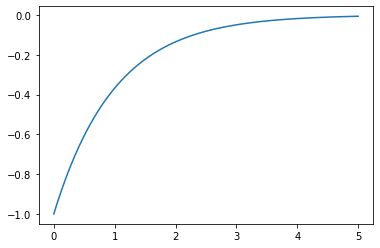

In [5]:
def linplot(v0):
    x = np.linspace(0,5,501)
    linsol = lambda z: v0*np.exp(-z)
    analyticalsoln = linsol(x)
    plt.plot(x,analyticalsoln)
    return
linplot(-1)

Question 3: Shooting method for linear 1-D system
Read the documentation and use the shooting method described in scipy.integrate.solve_bvp() to solve this equation for wall potential of 0.01V. Plot this solution along with the analytical solution determined in the previous question on the same graph.

Also, find out the absolute magnitude of error betweent the two solutions. Plot this on a separate graph too on a log scale.

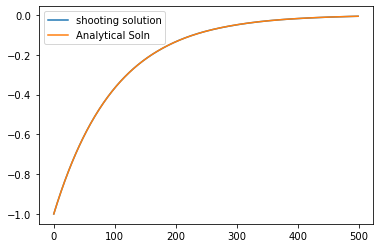

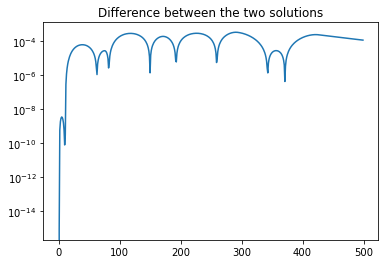

In [9]:
def eq(x,v):
    factor =1.6e-19*1.6e-19*6.022e23*(4e-3+4e-3)/(80.4*1.38e-23*298)
    return np.array([v[1],v[0]])

def shootmenowplis(v0):
    
    x = np.linspace(0,5,500)
    
    bc = lambda va,vb : np.array([va[0] - v0, vb[0]])
    
    #self defined shooting method
    sol1 = scipy.integrate.solve_ivp(eq,(0,5),[v0,0],t_eval = x)
    sol2 = scipy.integrate.solve_ivp(eq,(0,5),[0,1],t_eval = x)
    factor = - sol1.y[1][-1]/sol2.y[0][-1]
    finsol = sol1.y + (factor*sol2.y)
    
    linsol = lambda z: v0*np.exp(-z)
    analyticalsoln = linsol(x)
    
    plt.plot(finsol[0])
    plt.plot(analyticalsoln)

    plt.legend(["shooting solution","Analytical Soln"])
    plt.show()
    
    diff = np.abs(finsol[0] - analyticalsoln)
    
    plt.plot(diff)
    plt.title("Difference between the two solutions")
    plt.yscale("log")

    return
    
shootmenowplis(-1)

Question 4: Finite difference method for linear 1-D system
First, discretise the differential equation using the central difference method. Subsequently, solve the system of linear equations using numpy.linalg.solve(). Plot this solution along with the analytical solution determined in question 2 on the same graph.

Again, find the absolute error between the two solutions, and plot this too on a log scale.

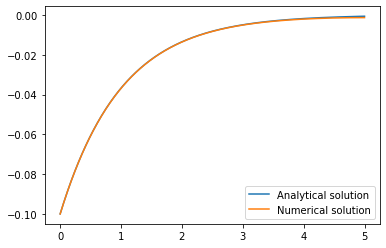

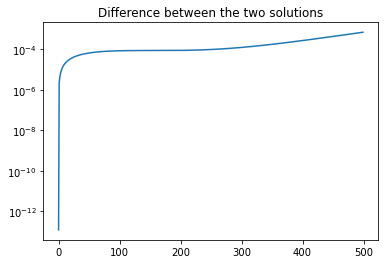

In [10]:
def findAmatrix(size):
    a = np.zeros((size,size))
    h = 5/size
    for i in range(1,size-1):
        a[i][i-1] = 1/(h*h)
        a[i][i] = -(2/(h*h))-1
        a[i][i+1] = 1/(h*h)
    
    a[0][0] = 1
    a[-1][-1] = 1
    a[-1][-2] = -1
    
    return a

def numerical1Dsol(v0):
    
    size = 500
    f = np.zeros(size)
    f[0] = v0
    a = findAmatrix(size)
    v = np.linalg.solve(a,f)
    axis = np.linspace(0,5,size)
    z = np.linspace(0,5,500)
    linsol = lambda x: v0*np.exp(-x)
    
    v2 = linsol(z)
    plt.plot(z,v2)
    plt.plot(axis,v)
    
    plt.legend(["Analytical solution","Numerical solution"])
    
    plt.show()
    
    diff = np.abs(v2 - v)
    
    plt.plot(diff)
    plt.title("Difference between the two solutions")
    plt.yscale("log")
    return
numerical1Dsol(-0.1)

## Non-Linear Systems

Question 1: Plotting the analytical Solution
For larger values of wall potentials, i.e. concentrated electrolyte solutions in the system, the linear approximation is not suitable. The non-linear solution when solved analytically for a 1:1 electrolyte yields the Guoy-Chapman solution, given by:

\begin{equation}
\ \psi = \frac{4k_BT}{e}tanh^\text{-1}(tanh\frac{4e\psi_0}{k_BT}e^\frac{-x}{\lambda})
\end{equation}

Plot this solution for three wall potential values of -0.01V, -0.1V and -1V. Also plot the linearised solution from Question 2 alongside these three, and observe the difference in the plots for different wall potentials. For the exponential term, use the vector numpy.linspace(0,5,501) as the \frac{x}{\lambda} term

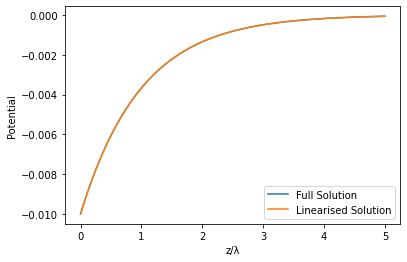

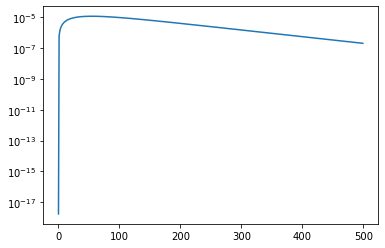

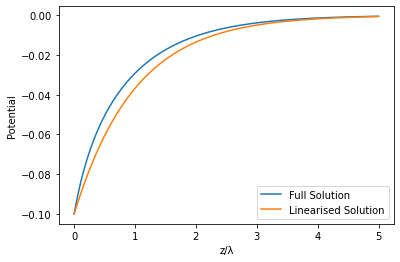

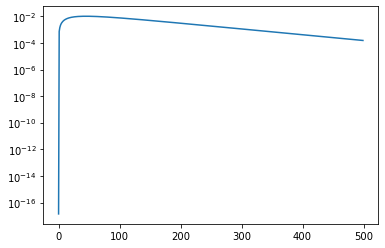

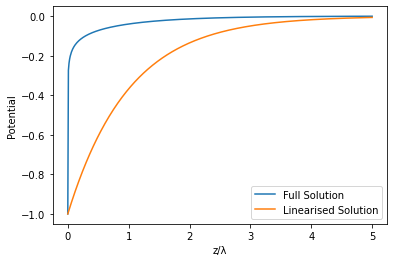

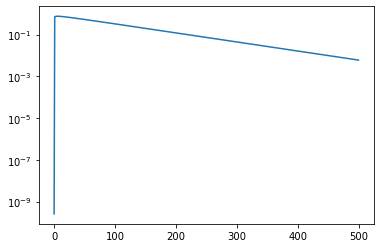

In [13]:
def plotsol(v0):
    z = np.linspace(0,5,500)
    fullsol = lambda x: 0.1035*np.arctanh(np.tanh(v0/0.1035)*np.exp(-x))
    v = fullsol(z)
    
    linsol = lambda x: v0*np.exp(-x)
    v2 = linsol(z)
    plt.plot(z,v)   
    plt.plot(z,v2)
    plt.legend(["Full Solution","Linearised Solution"])
    plt.xlabel("z/\u03BB")
    plt.ylabel("Potential")
    plt.show()
    
    diff = np.abs(v-v2)
    plt.plot(diff)
    plt.yscale("log")
    plt.show()
    return

plotsol(-0.01)
plotsol(-0.1)
plotsol(-1)


Question 2: Shooting method to solve a non-linear system

Non-dimensionalise the poisson-boltzmann equation (you must have done this in your MTP class too). Use the shooting method to solve this system. Pay attention to the boundary conditions: at x = 0 the Dirichlet condition applies, and at x/\lambda = 5, there is a Neumann boundary condition. 

Solve for a wall potential of -0.1 V at the Dirichlet boundary condition. Plot this solution, and the solution from the Guoy-Chapman equation (make sure to account for your initial non-dimensionalising of the problem before making the plots). Evaluate the absolute difference between the two solutions, and plot this difference on a log scale.

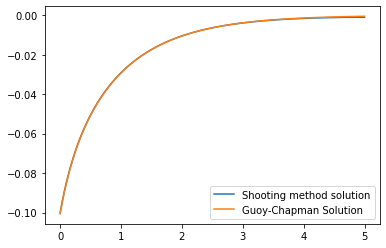

-3.8906721136076263 -3.8647342995169085
-0.02021062757700518 0.0
[0.02593781 0.02555764 0.02519228 ... 0.01969073 0.01979104 0.01989184]


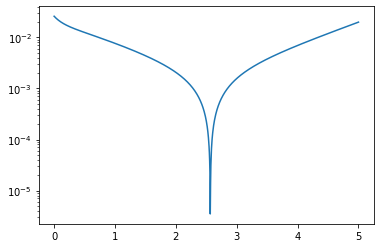

In [14]:
def analyticalsolution(v):   
    x = np.linspace(0,5,1001)
    v0 = v/(1.38e-23*298/1.6e-19)
    eqn = lambda x: 4*np.arctanh(np.exp(-x)*np.tanh(v0/4))
    sol = eqn(x)   
    return sol

def eq(x,v):
    return np.vstack((v[1],np.sinh(v[0])))

def trial(v0):
    
    x = np.linspace(0,5,1001)
    uinit = np.zeros((2,x.size))
    
    bc = lambda ua,ub: np.array([ua[0] - (v0/0.025875),ub[1]])
    
    res = scipy.integrate.solve_bvp(eq,bc,x,uinit,tol = 1e-3,bc_tol = 1e-3)
    
    
    sol = analyticalsolution(v0)
    
    plt.plot(x,0.025875*res.y[0])
    plt.plot(x,0.025875*sol)

    # the 0.025875 is the non-dimensionalising voltage, kT/e
    plt.legend(["Shooting method solution","Guoy-Chapman Solution"])
    plt.show()
    
    print(sol[0],res.y[0][0])
    print(sol[-1],res.y[-1][-1])
    delta = np.abs(sol-res.y[0])
    print(delta)
    plt.plot(x,delta)
    plt.yscale("log")
    plt.show()
    return

trial(-0.1)
# trial(-1)

Question 3: Finite Difference Method to solve a non-linear system
The first step is to define the problem correctly. Using a central difference scheme, write the system of equations as a sum of the Poisson 1-D matrix and a vector to write the non-linear sinh term. We will then solve this equation using the scipy.optimize.root() function, in two ways over the x-space vector x = numpy.linspace(0,5,501)

First, without the Jacobian. Plot the solution for v0 = -1, also evaluate the number of function evaluations required for the solution

2608


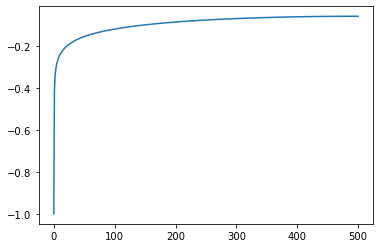

In [18]:
# from jax import jacfwd

size = 500
def poisson1Dmatrix():
    
    n = size
    e = np.ones((n+1))
    a = np.zeros((n+1,n+1))

    a[0:n,1:n+1] = a[0:n,1:n+1] - np.diag(e[0:-1],k=0)
    a[1:n+1,0:n] = a[1:n+1,0:n] - np.diag(e[0:-1],k=0)
    
    a = a + 2*np.diag(e)
    a = n*n*a

    a[0,0] = -1
    a[0,1] = 0
    a[-1,-1] = 1
    a[-1,-2] = -1
    # print(a)
    return a

def nonlinearterm():

    h = 1/size
    temp = np.zeros((size+1,size+1))
    
    for i in range(1,len(temp)-1):
        temp[i][i] = 1

    return temp

def solvenonlinear(v0):
  
  p1d = poisson1Dmatrix()
  nlt = nonlinearterm()
  temp = np.zeros(size+1)
  v0 = v0/0.025875
  temp[0] = v0

  temp2 = np.identity(size+1)

  temp2[0][0] = temp2[-1][-1] = 0
  
  fn = lambda v: np.matmul(p1d,v) + np.matmul(nlt,np.sinh(v)) + temp

  x = np.linspace(0,5,size+1)
  initguess = np.ones(size+1)*v0

  soln = scipy.optimize.root(fn,initguess)

  print(soln.nfev)
  plt.plot(soln.x*0.025875)
  plt.show()


solvenonlinear(-1)


Question 4: We will now solve the same problem by supplying the Jacobian ourselves. Define the jacobian and pass it as an additional argument to scipy.optimize.root(). Plot the solution for v0 = -1, also evaluate the number of function evaluations required for the solution. Note the difference in the number of function evaluations

84


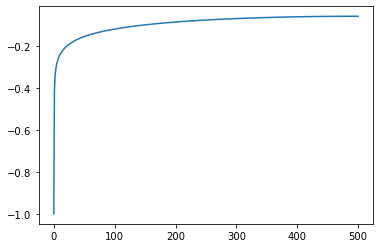

In [19]:
# from jax import jacfwd

size = 500
def poisson1Dmatrix():
    
    n = size
    e = np.ones((n+1))
    a = np.zeros((n+1,n+1))

    a[0:n,1:n+1] = a[0:n,1:n+1] - np.diag(e[0:-1],k=0)
    a[1:n+1,0:n] = a[1:n+1,0:n] - np.diag(e[0:-1],k=0)
    
    a = a + 2*np.diag(e)
    a = n*n*a

    a[0,0] = -1
    a[0,1] = 0
    a[-1,-1] = 1
    a[-1,-2] = -1
    # print(a)
    return a

def nonlinearterm():

    h = 1/size
    temp = np.zeros((size+1,size+1))
    
    for i in range(1,len(temp)-1):
        temp[i][i] = 1

    return temp

def solvenonlinear(v0):
  
  p1d = poisson1Dmatrix()
  nlt = nonlinearterm()
  temp = np.zeros(size+1)
  v0 = v0/0.025875
  temp[0] = v0

  temp2 = np.identity(size+1)

  temp2[0][0] = temp2[-1][-1] = 0

  fn = lambda v: np.matmul(p1d,v) + np.matmul(nlt,np.sinh(v)) + temp

  j = lambda v: p1d + np.multiply(np.diag(np.cosh(v)),temp2)

  x = np.linspace(0,5,size+1)
  initguess = np.ones(size+1)*v0

  sol2 = scipy.optimize.root(fn,initguess,jac = j)
    
  print(sol2.nfev)
  plt.plot(sol2.x*0.025875)
  plt.show()

solvenonlinear(-1)

Question 5: The problem remains the same, however, now use the inbuilt JAX library to evaluate the jacobian. Again, plot the solution and return the number of function evaluations for the solution.

In [ ]:
# Still to be done